In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sys import path
path.append('../../src/')
#path.append('../../../src/tools')
import numpy as np

#from numpy import *
import scipy as sp
from spatiallyAdaptiveExtendSplit import *
from spatiallyAdaptiveSingleDimension2 import *
from spatiallyAdaptiveCell import *

from PerformTestCase import *
from Function import *
from ErrorCalculator import *
from Utils import *
import math
dim = 5
a = 0
b = 1


Cannot plot function with dim > 2
Exact integral 2.64857774156e-06
Reference solution: 2.64857774156e-06
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
Curent number of function evaluations 11
max surplus error: 0.00390622088552 total surplus error: 0.075330463857
combiintegral: -0.044080463857
Current error: 16644.0696616
Finished refinement
Refined  20  times
New lmax: [3, 2, 2, 2, 2]
New lmax: [3, 3, 2, 2, 2]
New lmax: [3, 3, 3, 2, 2]
New lmax: [3, 3, 3, 3, 2]
New lmax: [3, 3, 3, 3, 3]
Curent number of function evaluations 71
max surplus error: 0.00186577822795 total surplus error: 0.0398617858379
combiintegral: -0.00534690895172
Current error: 2019.78497573
Finished refinement
Refined  20  times
New lmax: [4, 3, 3, 3, 3]
New lmax: [4, 4, 3, 3, 3]
New lmax: [4, 4, 4, 3, 3]
New lmax: [4, 4, 4, 4, 3]
New lmax: [4, 4, 4, 4, 4]
Curent number of function evaluations 251
max surplus error: 0.002534198529

Current error: 8.1056710864
Finished refinement
Refined  12  times
Rebalancing!
Rebalancing!
Curent number of function evaluations 184647
max surplus error: 1.22778448658e-07 total surplus error: 3.40475354219e-05
combiintegral: 2.32834408367e-05
Current error: 7.79092218867
Finished refinement
Refined  164  times
Rebalancing!
Rebalancing!
Rebalancing!
Rebalancing!
Rebalancing!
Rebalancing!
New lmax: [9, 9, 9, 9, 8]
New lmax: [9, 9, 9, 9, 9]
Curent number of function evaluations 206659
max surplus error: 1.65723028412e-07 total surplus error: 2.68990971464e-05
combiintegral: 3.39960527584e-05
Current error: 11.8355880309
Finished refinement
Refined  32  times
Curent number of function evaluations 207947
max surplus error: 6.11118113575e-08 total surplus error: 2.25359569376e-05
combiintegral: 3.42720508325e-05
Current error: 11.9397941751
Finished refinement
Refined  224  times
Rebalancing!
Rebalancing!
Rebalancing!
Rebalancing!
New lmax: [10, 9, 9, 9, 9]
Curent number of function eval

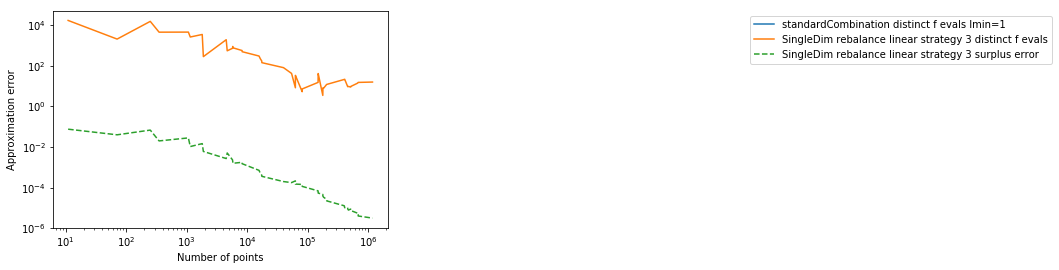

In [2]:
grid_single_dim_lin = GlobalTrapezoidalGrid(a=a*np.ones(dim), b=b*np.ones(dim), modified_basis=False, boundary=False)
grid=TrapezoidalGrid(np.ones(dim)*a, np.ones(dim)*b, modified_basis=False, boundary=False)

midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**1 * (d+1) for d in range(dim)])
f = GenzC0(midpoint=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [(adaptiveCombiInstanceSingleDim,1,2, errorOperatorSingleDim, 'SingleDim rebalance linear strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,1,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )


Cannot plot function with dim > 2
Exact integral 2.64857774156e-06
Reference solution: 2.64857774156e-06
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
Curent number of function evaluations 11
max surplus error: 0.00390622088552 total surplus error: 0.075330463857
combiintegral: -0.044080463857
Current error: 16644.0696616
Finished refinement
Refined  20  times
New lmax: [3, 2, 2, 2, 2]
New lmax: [3, 3, 2, 2, 2]
New lmax: [3, 3, 3, 2, 2]
New lmax: [3, 3, 3, 3, 2]
New lmax: [3, 3, 3, 3, 3]
Curent number of function evaluations 71
max surplus error: 0.00186577822795 total surplus error: 0.0398617858379
combiintegral: -0.00534690895172
Current error: 2019.78497573
Finished refinement
Refined  20  times
New lmax: [4, 3, 3, 3, 3]
New lmax: [4, 4, 3, 3, 3]
New lmax: [4, 4, 4, 3, 3]
New lmax: [4, 4, 4, 4, 3]
New lmax: [4, 4, 4, 4, 4]
Curent number of function evaluations 251
max surplus error: 0.002534198529

Curent number of function evaluations 881887
max surplus error: 6.15824713654e-08 total surplus error: 1.8706552956e-05
combiintegral: 2.51840807459e-05
Current error: 8.50852993691
Finished refinement
Refined  12  times
Curent number of function evaluations 882075
max surplus error: 3.05077723406e-08 total surplus error: 1.8256414803e-05
combiintegral: 2.50240586804e-05
Current error: 8.44811182535
Finished refinement
Refined  472  times
New lmax: [13, 10, 11, 11, 11]
New lmax: [13, 11, 11, 11, 11]
New lmax: [13, 11, 11, 12, 11]
New lmax: [13, 11, 11, 12, 12]
Curent number of function evaluations 1727987
max surplus error: 3.10248736454e-08 total surplus error: 7.24918317953e-06
combiintegral: 6.70596919221e-05
Current error: 24.3191329331
Number of refinements 2392
Number of distinct points used during the refinement 1727987
Time used (s): 27010.19764661789
Final error: 24.3191329331
[] [] Number of Points Standard lmin= 1
[] [] Distinct f evaks Standard lmin= 1
[] [] L2 interpolatio

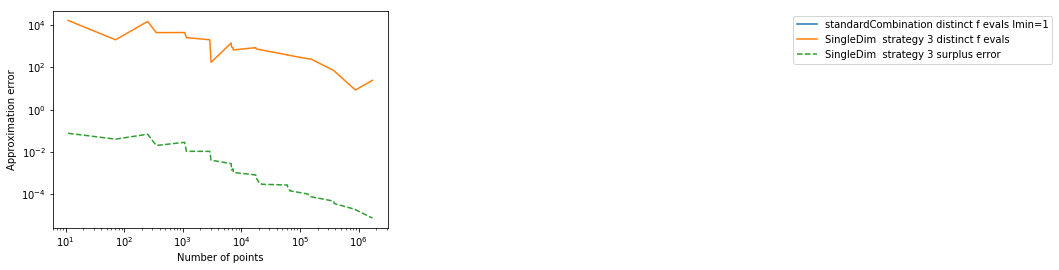

In [3]:
grid_single_dim_lin = GlobalTrapezoidalGrid(a=a*np.ones(dim), b=b*np.ones(dim), modified_basis=False, boundary=False)
grid=TrapezoidalGrid(np.ones(dim)*a, np.ones(dim)*b, modified_basis=False, boundary=False)

midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**1 * (d+1) for d in range(dim)])
f = GenzC0(midpoint=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [(adaptiveCombiInstanceSingleDim3,1,2, errorOperatorSingleDim, 'SingleDim  strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,1,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )


Cannot plot function with dim > 2
Exact integral 2.64857774156e-06
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
CombiSolution [-0.04408046]
Analytic Solution 2.64857774156e-06
Difference 0.0440831124347
0 [1, 1, 1, 1, 3] 1.0
1 [1, 1, 1, 2, 2] 1.0
2 [1, 1, 1, 3, 1] 1.0
3 [1, 1, 2, 1, 2] 1.0
4 [1, 1, 2, 2, 1] 1.0
5 [1, 1, 3, 1, 1] 1.0
6 [1, 2, 1, 1, 2] 1.0
7 [1, 2, 1, 2, 1] 1.0
8 [1, 2, 2, 1, 1] 1.0
9 [1, 3, 1, 1, 1] 1.0
10 [2, 1, 1, 1, 2] 1.0
11 [2, 1, 1, 2, 1] 1.0
12 [2, 1, 2, 1, 1] 1.0
13 [2, 2, 1, 1, 1] 1.0
14 [3, 1, 1, 1, 1] 1.0
15 [1, 1, 1, 1, 2] -4.0
16 [1, 1, 1, 2, 1] -4.0
17 [1, 1, 2, 1, 1] -4.0
18 [1, 2, 1, 1, 1] -4.0
19 [2, 1, 1, 1, 1] -4.0
20 [1, 1, 1, 1, 1] 6.0
CombiSolution [-0.00534691]
Analytic Solution 2.64857774156e-06
Difference 0.00534955752946
0 [1, 1, 1, 1, 4] 1.0
1 [1, 1, 1, 2, 3] 1.0
2 [1, 1, 1, 3, 2] 1.0
3 [1, 1, 1, 4, 1] 1.0
4 [1, 1, 2, 1, 3] 1.0
5 [1, 1, 2, 2, 2] 1.0
6 [1, 1

CombiSolution [ 0.00194799]
Analytic Solution 2.64857774156e-06
Difference 0.00194534129256
0 [1, 1, 1, 1, 7] 1.0
1 [1, 1, 1, 2, 6] 1.0
2 [1, 1, 1, 3, 5] 1.0
3 [1, 1, 1, 4, 4] 1.0
4 [1, 1, 1, 5, 3] 1.0
5 [1, 1, 1, 6, 2] 1.0
6 [1, 1, 1, 7, 1] 1.0
7 [1, 1, 2, 1, 6] 1.0
8 [1, 1, 2, 2, 5] 1.0
9 [1, 1, 2, 3, 4] 1.0
10 [1, 1, 2, 4, 3] 1.0
11 [1, 1, 2, 5, 2] 1.0
12 [1, 1, 2, 6, 1] 1.0
13 [1, 1, 3, 1, 5] 1.0
14 [1, 1, 3, 2, 4] 1.0
15 [1, 1, 3, 3, 3] 1.0
16 [1, 1, 3, 4, 2] 1.0
17 [1, 1, 3, 5, 1] 1.0
18 [1, 1, 4, 1, 4] 1.0
19 [1, 1, 4, 2, 3] 1.0
20 [1, 1, 4, 3, 2] 1.0
21 [1, 1, 4, 4, 1] 1.0
22 [1, 1, 5, 1, 3] 1.0
23 [1, 1, 5, 2, 2] 1.0
24 [1, 1, 5, 3, 1] 1.0
25 [1, 1, 6, 1, 2] 1.0
26 [1, 1, 6, 2, 1] 1.0
27 [1, 1, 7, 1, 1] 1.0
28 [1, 2, 1, 1, 6] 1.0
29 [1, 2, 1, 2, 5] 1.0
30 [1, 2, 1, 3, 4] 1.0
31 [1, 2, 1, 4, 3] 1.0
32 [1, 2, 1, 5, 2] 1.0
33 [1, 2, 1, 6, 1] 1.0
34 [1, 2, 2, 1, 5] 1.0
35 [1, 2, 2, 2, 4] 1.0
36 [1, 2, 2, 3, 3] 1.0
37 [1, 2, 2, 4, 2] 1.0
38 [1, 2, 2, 5, 1] 1.0
39 [1, 2, 3, 1, 4] 1.

CombiSolution [-0.00137506]
Analytic Solution 2.64857774156e-06
Difference 0.00137770477104
0 [1, 1, 1, 1, 8] 1.0
1 [1, 1, 1, 2, 7] 1.0
2 [1, 1, 1, 3, 6] 1.0
3 [1, 1, 1, 4, 5] 1.0
4 [1, 1, 1, 5, 4] 1.0
5 [1, 1, 1, 6, 3] 1.0
6 [1, 1, 1, 7, 2] 1.0
7 [1, 1, 1, 8, 1] 1.0
8 [1, 1, 2, 1, 7] 1.0
9 [1, 1, 2, 2, 6] 1.0
10 [1, 1, 2, 3, 5] 1.0
11 [1, 1, 2, 4, 4] 1.0
12 [1, 1, 2, 5, 3] 1.0
13 [1, 1, 2, 6, 2] 1.0
14 [1, 1, 2, 7, 1] 1.0
15 [1, 1, 3, 1, 6] 1.0
16 [1, 1, 3, 2, 5] 1.0
17 [1, 1, 3, 3, 4] 1.0
18 [1, 1, 3, 4, 3] 1.0
19 [1, 1, 3, 5, 2] 1.0
20 [1, 1, 3, 6, 1] 1.0
21 [1, 1, 4, 1, 5] 1.0
22 [1, 1, 4, 2, 4] 1.0
23 [1, 1, 4, 3, 3] 1.0
24 [1, 1, 4, 4, 2] 1.0
25 [1, 1, 4, 5, 1] 1.0
26 [1, 1, 5, 1, 4] 1.0
27 [1, 1, 5, 2, 3] 1.0
28 [1, 1, 5, 3, 2] 1.0
29 [1, 1, 5, 4, 1] 1.0
30 [1, 1, 6, 1, 3] 1.0
31 [1, 1, 6, 2, 2] 1.0
32 [1, 1, 6, 3, 1] 1.0
33 [1, 1, 7, 1, 2] 1.0
34 [1, 1, 7, 2, 1] 1.0
35 [1, 1, 8, 1, 1] 1.0
36 [1, 2, 1, 1, 7] 1.0
37 [1, 2, 1, 2, 6] 1.0
38 [1, 2, 1, 3, 5] 1.0
39 [1, 2, 1, 4, 4] 1.

CombiSolution [-0.00163241]
Analytic Solution 2.64857774156e-06
Difference 0.00163506041474
0 [1, 1, 1, 1, 9] 1.0
1 [1, 1, 1, 2, 8] 1.0
2 [1, 1, 1, 3, 7] 1.0
3 [1, 1, 1, 4, 6] 1.0
4 [1, 1, 1, 5, 5] 1.0
5 [1, 1, 1, 6, 4] 1.0
6 [1, 1, 1, 7, 3] 1.0
7 [1, 1, 1, 8, 2] 1.0
8 [1, 1, 1, 9, 1] 1.0
9 [1, 1, 2, 1, 8] 1.0
10 [1, 1, 2, 2, 7] 1.0
11 [1, 1, 2, 3, 6] 1.0
12 [1, 1, 2, 4, 5] 1.0
13 [1, 1, 2, 5, 4] 1.0
14 [1, 1, 2, 6, 3] 1.0
15 [1, 1, 2, 7, 2] 1.0
16 [1, 1, 2, 8, 1] 1.0
17 [1, 1, 3, 1, 7] 1.0
18 [1, 1, 3, 2, 6] 1.0
19 [1, 1, 3, 3, 5] 1.0
20 [1, 1, 3, 4, 4] 1.0
21 [1, 1, 3, 5, 3] 1.0
22 [1, 1, 3, 6, 2] 1.0
23 [1, 1, 3, 7, 1] 1.0
24 [1, 1, 4, 1, 6] 1.0
25 [1, 1, 4, 2, 5] 1.0
26 [1, 1, 4, 3, 4] 1.0
27 [1, 1, 4, 4, 3] 1.0
28 [1, 1, 4, 5, 2] 1.0
29 [1, 1, 4, 6, 1] 1.0
30 [1, 1, 5, 1, 5] 1.0
31 [1, 1, 5, 2, 4] 1.0
32 [1, 1, 5, 3, 3] 1.0
33 [1, 1, 5, 4, 2] 1.0
34 [1, 1, 5, 5, 1] 1.0
35 [1, 1, 6, 1, 4] 1.0
36 [1, 1, 6, 2, 3] 1.0
37 [1, 1, 6, 3, 2] 1.0
38 [1, 1, 6, 4, 1] 1.0
39 [1, 1, 7, 1, 3] 1.

CombiSolution [-0.00090937]
Analytic Solution 2.64857774156e-06
Difference 0.000912022180802
0 [1, 1, 1, 1, 10] 1.0
1 [1, 1, 1, 2, 9] 1.0
2 [1, 1, 1, 3, 8] 1.0
3 [1, 1, 1, 4, 7] 1.0
4 [1, 1, 1, 5, 6] 1.0
5 [1, 1, 1, 6, 5] 1.0
6 [1, 1, 1, 7, 4] 1.0
7 [1, 1, 1, 8, 3] 1.0
8 [1, 1, 1, 9, 2] 1.0
9 [1, 1, 1, 10, 1] 1.0
10 [1, 1, 2, 1, 9] 1.0
11 [1, 1, 2, 2, 8] 1.0
12 [1, 1, 2, 3, 7] 1.0
13 [1, 1, 2, 4, 6] 1.0
14 [1, 1, 2, 5, 5] 1.0
15 [1, 1, 2, 6, 4] 1.0
16 [1, 1, 2, 7, 3] 1.0
17 [1, 1, 2, 8, 2] 1.0
18 [1, 1, 2, 9, 1] 1.0
19 [1, 1, 3, 1, 8] 1.0
20 [1, 1, 3, 2, 7] 1.0
21 [1, 1, 3, 3, 6] 1.0
22 [1, 1, 3, 4, 5] 1.0
23 [1, 1, 3, 5, 4] 1.0
24 [1, 1, 3, 6, 3] 1.0
25 [1, 1, 3, 7, 2] 1.0
26 [1, 1, 3, 8, 1] 1.0
27 [1, 1, 4, 1, 7] 1.0
28 [1, 1, 4, 2, 6] 1.0
29 [1, 1, 4, 3, 5] 1.0
30 [1, 1, 4, 4, 4] 1.0
31 [1, 1, 4, 5, 3] 1.0
32 [1, 1, 4, 6, 2] 1.0
33 [1, 1, 4, 7, 1] 1.0
34 [1, 1, 5, 1, 6] 1.0
35 [1, 1, 5, 2, 5] 1.0
36 [1, 1, 5, 3, 4] 1.0
37 [1, 1, 5, 4, 3] 1.0
38 [1, 1, 5, 5, 2] 1.0
39 [1, 1, 5, 6, 1]

1855 [3, 2, 2, 2, 1] 1.0
1856 [3, 2, 3, 1, 1] 1.0
1857 [3, 3, 1, 1, 2] 1.0
1858 [3, 3, 1, 2, 1] 1.0
1859 [3, 3, 2, 1, 1] 1.0
1860 [3, 4, 1, 1, 1] 1.0
1861 [4, 1, 1, 1, 3] 1.0
1862 [4, 1, 1, 2, 2] 1.0
1863 [4, 1, 1, 3, 1] 1.0
1864 [4, 1, 2, 1, 2] 1.0
1865 [4, 1, 2, 2, 1] 1.0
1866 [4, 1, 3, 1, 1] 1.0
1867 [4, 2, 1, 1, 2] 1.0
1868 [4, 2, 1, 2, 1] 1.0
1869 [4, 2, 2, 1, 1] 1.0
1870 [4, 3, 1, 1, 1] 1.0
1871 [5, 1, 1, 1, 2] 1.0
1872 [5, 1, 1, 2, 1] 1.0
1873 [5, 1, 2, 1, 1] 1.0
1874 [5, 2, 1, 1, 1] 1.0
1875 [6, 1, 1, 1, 1] 1.0
CombiSolution [-0.00030492]
Analytic Solution 2.64857774156e-06
Difference 0.000307573324492
0 [1, 1, 1, 1, 11] 1.0
1 [1, 1, 1, 2, 10] 1.0
2 [1, 1, 1, 3, 9] 1.0
3 [1, 1, 1, 4, 8] 1.0
4 [1, 1, 1, 5, 7] 1.0
5 [1, 1, 1, 6, 6] 1.0
6 [1, 1, 1, 7, 5] 1.0
7 [1, 1, 1, 8, 4] 1.0
8 [1, 1, 1, 9, 3] 1.0
9 [1, 1, 1, 10, 2] 1.0
10 [1, 1, 1, 11, 1] 1.0
11 [1, 1, 2, 1, 10] 1.0
12 [1, 1, 2, 2, 9] 1.0
13 [1, 1, 2, 3, 8] 1.0
14 [1, 1, 2, 4, 7] 1.0
15 [1, 1, 2, 5, 6] 1.0
16 [1, 1, 2, 6, 5] 

1977 [2, 4, 3, 3, 1] 6.0
1978 [2, 4, 4, 1, 2] 6.0
1979 [2, 4, 4, 2, 1] 6.0
1980 [2, 4, 5, 1, 1] 6.0
1981 [2, 5, 1, 1, 4] 6.0
1982 [2, 5, 1, 2, 3] 6.0
1983 [2, 5, 1, 3, 2] 6.0
1984 [2, 5, 1, 4, 1] 6.0
1985 [2, 5, 2, 1, 3] 6.0
1986 [2, 5, 2, 2, 2] 6.0
1987 [2, 5, 2, 3, 1] 6.0
1988 [2, 5, 3, 1, 2] 6.0
1989 [2, 5, 3, 2, 1] 6.0
1990 [2, 5, 4, 1, 1] 6.0
1991 [2, 6, 1, 1, 3] 6.0
1992 [2, 6, 1, 2, 2] 6.0
1993 [2, 6, 1, 3, 1] 6.0
1994 [2, 6, 2, 1, 2] 6.0
1995 [2, 6, 2, 2, 1] 6.0
1996 [2, 6, 3, 1, 1] 6.0
1997 [2, 7, 1, 1, 2] 6.0
1998 [2, 7, 1, 2, 1] 6.0
1999 [2, 7, 2, 1, 1] 6.0
2000 [2, 8, 1, 1, 1] 6.0
2001 [3, 1, 1, 1, 7] 6.0
2002 [3, 1, 1, 2, 6] 6.0
2003 [3, 1, 1, 3, 5] 6.0
2004 [3, 1, 1, 4, 4] 6.0
2005 [3, 1, 1, 5, 3] 6.0
2006 [3, 1, 1, 6, 2] 6.0
2007 [3, 1, 1, 7, 1] 6.0
2008 [3, 1, 2, 1, 6] 6.0
2009 [3, 1, 2, 2, 5] 6.0
2010 [3, 1, 2, 3, 4] 6.0
2011 [3, 1, 2, 4, 3] 6.0
2012 [3, 1, 2, 5, 2] 6.0
2013 [3, 1, 2, 6, 1] 6.0
2014 [3, 1, 3, 1, 5] 6.0
2015 [3, 1, 3, 2, 4] 6.0
2016 [3, 1, 3, 3, 3] 6.0


CombiSolution [ -2.04844096e-05]
Analytic Solution 2.64857774156e-06
Difference 2.31329873092e-05
0 [1, 1, 1, 1, 12] 1.0
1 [1, 1, 1, 2, 11] 1.0
2 [1, 1, 1, 3, 10] 1.0
3 [1, 1, 1, 4, 9] 1.0
4 [1, 1, 1, 5, 8] 1.0
5 [1, 1, 1, 6, 7] 1.0
6 [1, 1, 1, 7, 6] 1.0
7 [1, 1, 1, 8, 5] 1.0
8 [1, 1, 1, 9, 4] 1.0
9 [1, 1, 1, 10, 3] 1.0
10 [1, 1, 1, 11, 2] 1.0
11 [1, 1, 1, 12, 1] 1.0
12 [1, 1, 2, 1, 11] 1.0
13 [1, 1, 2, 2, 10] 1.0
14 [1, 1, 2, 3, 9] 1.0
15 [1, 1, 2, 4, 8] 1.0
16 [1, 1, 2, 5, 7] 1.0
17 [1, 1, 2, 6, 6] 1.0
18 [1, 1, 2, 7, 5] 1.0
19 [1, 1, 2, 8, 4] 1.0
20 [1, 1, 2, 9, 3] 1.0
21 [1, 1, 2, 10, 2] 1.0
22 [1, 1, 2, 11, 1] 1.0
23 [1, 1, 3, 1, 10] 1.0
24 [1, 1, 3, 2, 9] 1.0
25 [1, 1, 3, 3, 8] 1.0
26 [1, 1, 3, 4, 7] 1.0
27 [1, 1, 3, 5, 6] 1.0
28 [1, 1, 3, 6, 5] 1.0
29 [1, 1, 3, 7, 4] 1.0
30 [1, 1, 3, 8, 3] 1.0
31 [1, 1, 3, 9, 2] 1.0
32 [1, 1, 3, 10, 1] 1.0
33 [1, 1, 4, 1, 9] 1.0
34 [1, 1, 4, 2, 8] 1.0
35 [1, 1, 4, 3, 7] 1.0
36 [1, 1, 4, 4, 6] 1.0
37 [1, 1, 4, 5, 5] 1.0
38 [1, 1, 4, 6, 4] 1.0
39 

1557 [1, 4, 5, 1, 4] -4.0
1558 [1, 4, 5, 2, 3] -4.0
1559 [1, 4, 5, 3, 2] -4.0
1560 [1, 4, 5, 4, 1] -4.0
1561 [1, 4, 6, 1, 3] -4.0
1562 [1, 4, 6, 2, 2] -4.0
1563 [1, 4, 6, 3, 1] -4.0
1564 [1, 4, 7, 1, 2] -4.0
1565 [1, 4, 7, 2, 1] -4.0
1566 [1, 4, 8, 1, 1] -4.0
1567 [1, 5, 1, 1, 7] -4.0
1568 [1, 5, 1, 2, 6] -4.0
1569 [1, 5, 1, 3, 5] -4.0
1570 [1, 5, 1, 4, 4] -4.0
1571 [1, 5, 1, 5, 3] -4.0
1572 [1, 5, 1, 6, 2] -4.0
1573 [1, 5, 1, 7, 1] -4.0
1574 [1, 5, 2, 1, 6] -4.0
1575 [1, 5, 2, 2, 5] -4.0
1576 [1, 5, 2, 3, 4] -4.0
1577 [1, 5, 2, 4, 3] -4.0
1578 [1, 5, 2, 5, 2] -4.0
1579 [1, 5, 2, 6, 1] -4.0
1580 [1, 5, 3, 1, 5] -4.0
1581 [1, 5, 3, 2, 4] -4.0
1582 [1, 5, 3, 3, 3] -4.0
1583 [1, 5, 3, 4, 2] -4.0
1584 [1, 5, 3, 5, 1] -4.0
1585 [1, 5, 4, 1, 4] -4.0
1586 [1, 5, 4, 2, 3] -4.0
1587 [1, 5, 4, 3, 2] -4.0
1588 [1, 5, 4, 4, 1] -4.0
1589 [1, 5, 5, 1, 3] -4.0
1590 [1, 5, 5, 2, 2] -4.0
1591 [1, 5, 5, 3, 1] -4.0
1592 [1, 5, 6, 1, 2] -4.0
1593 [1, 5, 6, 2, 1] -4.0
1594 [1, 5, 7, 1, 1] -4.0
1595 [1, 6, 

3281 [2, 1, 8, 1, 1] -4.0
3282 [2, 2, 1, 1, 7] -4.0
3283 [2, 2, 1, 2, 6] -4.0
3284 [2, 2, 1, 3, 5] -4.0
3285 [2, 2, 1, 4, 4] -4.0
3286 [2, 2, 1, 5, 3] -4.0
3287 [2, 2, 1, 6, 2] -4.0
3288 [2, 2, 1, 7, 1] -4.0
3289 [2, 2, 2, 1, 6] -4.0
3290 [2, 2, 2, 2, 5] -4.0
3291 [2, 2, 2, 3, 4] -4.0
3292 [2, 2, 2, 4, 3] -4.0
3293 [2, 2, 2, 5, 2] -4.0
3294 [2, 2, 2, 6, 1] -4.0
3295 [2, 2, 3, 1, 5] -4.0
3296 [2, 2, 3, 2, 4] -4.0
3297 [2, 2, 3, 3, 3] -4.0
3298 [2, 2, 3, 4, 2] -4.0
3299 [2, 2, 3, 5, 1] -4.0
3300 [2, 2, 4, 1, 4] -4.0
3301 [2, 2, 4, 2, 3] -4.0
3302 [2, 2, 4, 3, 2] -4.0
3303 [2, 2, 4, 4, 1] -4.0
3304 [2, 2, 5, 1, 3] -4.0
3305 [2, 2, 5, 2, 2] -4.0
3306 [2, 2, 5, 3, 1] -4.0
3307 [2, 2, 6, 1, 2] -4.0
3308 [2, 2, 6, 2, 1] -4.0
3309 [2, 2, 7, 1, 1] -4.0
3310 [2, 3, 1, 1, 6] -4.0
3311 [2, 3, 1, 2, 5] -4.0
3312 [2, 3, 1, 3, 4] -4.0
3313 [2, 3, 1, 4, 3] -4.0
3314 [2, 3, 1, 5, 2] -4.0
3315 [2, 3, 1, 6, 1] -4.0
3316 [2, 3, 2, 1, 5] -4.0
3317 [2, 3, 2, 2, 4] -4.0
3318 [2, 3, 2, 3, 3] -4.0
3319 [2, 3, 

CombiSolution [  5.87937639e-05]
Analytic Solution 2.64857774156e-06
Difference 5.61451861548e-05
[11, 71, 351, 1471, 5503, 18943, 61183, 187903, 553983, 1579007, 4374527] [16644.069661617246, 2019.7849757319057, 4415.4947531629914, 3310.5334984239789, 734.485252984201, 520.16776756062552, 617.33525472331837, 344.3441234481802, 116.12773137276018, 8.7341167851159636, 21.198239822739318] Number of Points Standard lmin= 1
[11, 71, 351, 1471, 5503, 18943, 61183, 187903, 553983, 1579007, 4374527] [16644.069661617246, 2019.7849757319057, 4415.4947531629914, 3310.5334984239789, 734.485252984201, 520.16776756062552, 617.33525472331837, 344.3441234481802, 116.12773137276018, 8.7341167851159636, 21.198239822739318] Distinct f evaks Standard lmin= 1
[11, 71, 351, 1471, 5503, 18943, 61183, 187903, 553983, 1579007, 4374527] [21.35512049929487, 18.913045557793733, 11.802865418674534, 10.41696930187379, 5.7595664821282995, 3.1339862344159086, 2.0823568778925572, 0.97469858739894388, 0.37702739083741

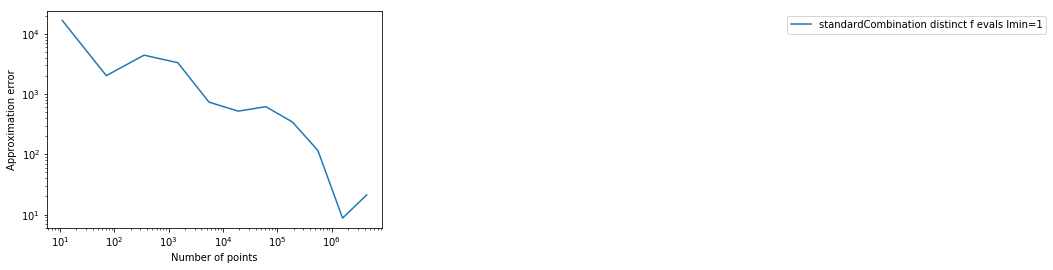

In [4]:
grid_single_dim_lin = GlobalTrapezoidalGrid(a=a*np.ones(dim), b=b*np.ones(dim), modified_basis=False, boundary=False)
grid=TrapezoidalGrid(np.ones(dim)*a, np.ones(dim)*b, modified_basis=False, boundary=False)

midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**1 * (d+1) for d in range(dim)])
f = GenzC0(midpoint=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = []#[(adaptiveCombiInstanceSingleDim,1,2, errorOperatorSingleDim, 'SingleDim rebalance linear strategy 3'), (adaptiveCombiInstanceSingleDim3,1,2, errorOperatorSingleDim, 'SingleDim  strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,12,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )
